In [1]:
#autoreload
%load_ext autoreload

%autoreload 2

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm, trange

In [3]:
sizeX = 8
sizeY = 8
nX = 90
nY = 43
n_palette = 128

# Video

In [4]:
from src.img_manip import create_images_from_videos_and_resize

cap = cv.VideoCapture("../Bad_Apple.mp4")


frames = create_images_from_videos_and_resize(cap, sizeX, sizeY, nX, nY)[:1000]

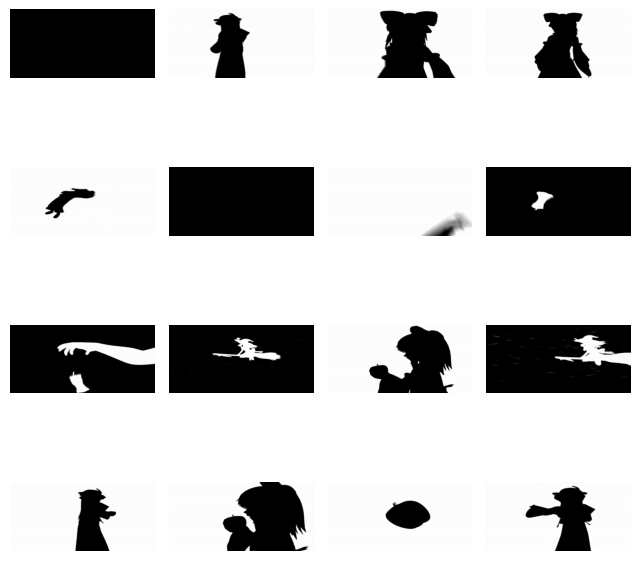

In [5]:
from src.display import display_images


display_images(frames)

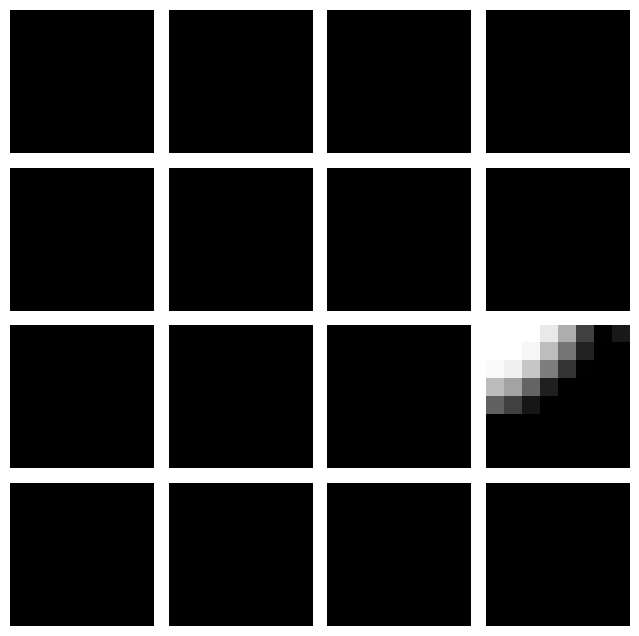

In [6]:
from src.tiles import create_tiles_from_image


tiless = np.array([create_tiles_from_image(img, sizeX, sizeY) for img in frames])
tiles = np.concatenate(tiless, axis=0)

display_images(tiles)

In [7]:
tiles.shape

(3870000, 8, 8)

In [8]:
from src.palette_creation import create_palette_from_tiles

palette, closest_tile = create_palette_from_tiles(tiles, n_palette)

  0%|          | 0/128 [00:00<?, ?it/s]

Found 128 colors


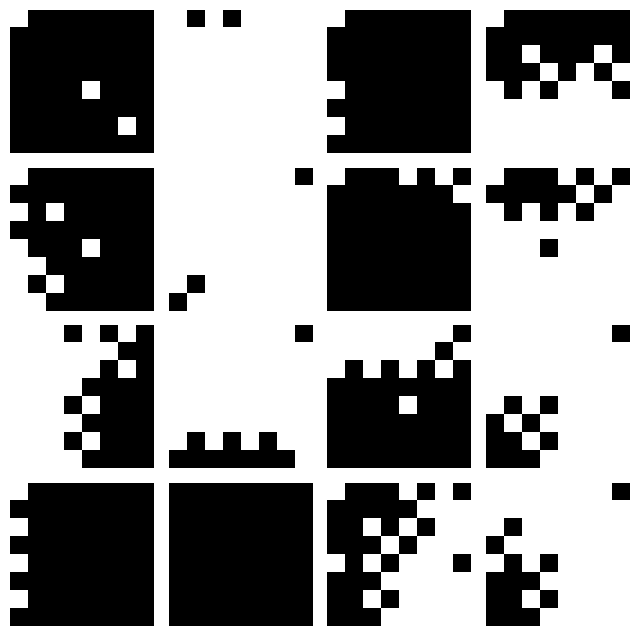

In [9]:
display_images(palette)

In [10]:
print(palette.shape)
print(closest_tile.shape)
# reshape closest_tile to have the same shape as the tiless
closest_tile_frames = closest_tile.reshape(tiless.shape[0], tiless.shape[1])
print(closest_tile_frames.shape)

(128, 8, 8)
(3870000,)
(1000, 3870)


  0%|          | 0/1000 [00:00<?, ?it/s]

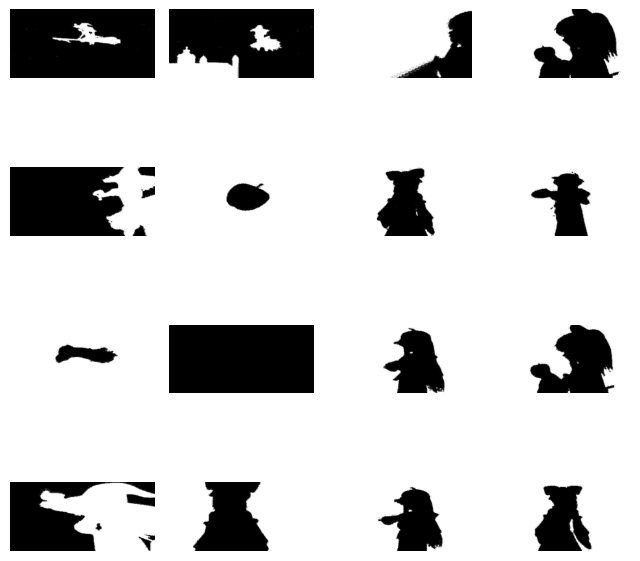

In [11]:
from src.tiles import create_image_from_tiles


frames_dith = []

for i in trange(tiless.shape[0]):
    closest_tile_frame = closest_tile_frames[i]
    frame = create_image_from_tiles(palette[closest_tile_frame], nX, nY)

    frames_dith.append(frame)

display_images(frames_dith)

In [12]:
from src.img_manip import save_images_as_video

save_images_as_video(frames_dith, f"matrix_dithered_{n_palette}_{sizeY}.mp4")

  0%|          | 0/1000 [00:00<?, ?it/s]

In [13]:
from src.save_to_file import save_palette_to_file

save_palette_to_file(palette, n_palette, f"matrix2_palette_{n_palette}_{sizeY}.txt")

In [14]:
from src.save_to_file import save_closest_tile_frames_to_file

save_closest_tile_frames_to_file(
    closest_tile_frames, f"matrix2_closest_tile_{n_palette}_{sizeY}.txt"
)

  0%|          | 0/1000 [00:00<?, ?it/s]